# Chapter4. 신경망 학습

* 학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득
* 손실함수 : 신경망이 학습할 수 있도록 해주는 지표

## 4.1 데이터에서 학습한다!

3장에서는 매개변수를 수작업으로 설정해주었지만, 현실적으로 그것은 불가능함

### 4.1.1 데이터 주도 학습

(기계학습)
* 모아진 데이터로부터 규칙을 찾아내는 역할을 기계가 담당
* 이미지를 벡터로 변환할 때 사용하는 특징은 사람이 설계

(딥러닝=신경망)
* 사람이 개입하지 않음

<img src="./images/4-2.png" width="350" height="350"/>
[4-2]

### 4.1.2 훈련 데이터와 시험 데이터

(기계학습에서 데이터를 취급할 때 주의점)
* 기계학습에서는 데이터를 훈련 데이터와 시험 데이터로 나눠 학습과 실험을 수행하는 것이 일반적
* 범용 능력을 제대로 평가하기 위해 분리
* 오버피팅을 피하는 것이 중요한 과제

## 4.2 손실함수

* 손실 함수 : 신경망 성능의 나쁨을 나타내는 지표로 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 못했는지를 나타냄

### 4.2.1 오차 제곱합

(Sum of Squares for Error; SSE)

<img src="./images/4.1.png" width="200" height="200"/>
(4.1)

* SSE는 오차의 제곱항으로 2를 나눌필요는 없지만, 델다 규직때문에 경사 하강법 과정중 발생할 수 있는 오류를 최소하하기 위함이라고 한다

* 교재에는 위 식이 MSE(Mean Squared Error)로 되어 있다. MSE는 SSE를 자유도로 나눠준 식으로 위 식을 MSE라고 보기에는 어렵지 않을까 싶다. 하지만 앞으로 일단은 교재의 표기를 따르기로 한다.

In [1]:
import numpy as np

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 예시

In [4]:
t = [0,0,1,0,0,0,0,0,0,0] # 정답 2
y =[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 정답을 2라고 예측

In [5]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 정답을 7이라고 예측

In [7]:
mean_squared_error(np.array(y), np.array(t))

0.5975

#### (결과의 해석)

* 손실 함수 쪽 출력이 작으면 정답 레이블과의 오차도 작을 것 같다.(즉, 정답일 확률이 높을 것 같다)

### 4.2.2 교차 엔트로피 오차

(Cross Entropy Error; CEE)

<img src="./images/4.2.png" width="200" height="200"/>
(4.2)

#### (특징)

* 원-핫 인코딩과 함께라면 정답일 때의 자연로그를 계산하는 식이 된다

In [8]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

In [9]:
# 아까의 예시

In [10]:
t = [0,0,1,0,0,0,0,0,0,0] # 정답 2
y =[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 정답을 2라고 예측

In [11]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [12]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 정답을 7이라고 예측

In [13]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

#### (결과의 해석)

* 손실 함수 쪽 출력이 작으면 정답 레이블과의 오차도 작을 것 같다.(즉, 정답일 확률이 높을 것 같다)

### 4.2.3 미니배치 학습

데이터 전체에 대한 교차 엔트로피 오차

<img src="./images/4.3.png" width="200" height="200"/>
(4.3)

* 미니배치 : 모든 데이터를 대상으로 손실 함수의 합을 구하는 것이 비효율적이므로 일부만 골라서 수행하는 것
* 미니배치 학습 : 훈련 데이터 중 가령 100장을 무작위로 뽑아 학습하는 것

In [14]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [15]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [16]:
x_train.shape

(60000, 784)

In [17]:
t_train.shape

(60000, 10)

In [18]:
# 랜덤으로 10장만 뽑기

In [19]:
train_size = x_train.shape[0]

In [20]:
batch_size = 10

In [21]:
batch_mask = np.random.choice(train_size, batch_size)

In [22]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [23]:
#np.random.choice 확인

In [24]:
np.random.choice(60000, 10)

array([ 8748, 40660, 40159, 49310, 35097, 33772, 28376, 22888, 23580,
       44375])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [25]:
# 데이터가 하나인 경우와 배치로 묶여 입력된 경우를 고려하여 설계

In [26]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
    return -np.sum(t * np.log(y)) / batch_size

In [27]:
#### 원핫인코딩 고려하면 0이 아닐 때만 계산하면 된다

In [28]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

### 4.2.5 왜 손실 함수를 설정하는가?

#### (의문점)

* 궁극적인 목표는 높은 정확도인데 정확도라는 지표 대신 손실 함수를 사용하는 이유는 무엇인가
    * => 미분 때문
    * => 신경망학습은 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾음(우리는 손실함수의 값을 최소화해야하는 과제를 가지고 있다)
    * => 매개변수의 미분(정확히는 기울기)를 계산하고, 그 미분 값을 단서로 매개변수의 값을 갱신하는 과정 반복
    * 미분값이 0이면 매개변수의 갱신은 멈춤
    * 이 때 포인트는 가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실함수가 어떻게 변하는지의 차원에서 미분을 함
    * => 미분 값이 음수면 가중치 매개변수를 양의 방향으로 변화시키고 양수면 음의 방향으로 변화시켜 손실 함수의 값을 줄여 최종적으로 0을 만듦


#### (아이디어 예시) 
* 최고차항이 양수인 이차함수를 생각한다. 기울기가 양수인 점에서는 값을 감소시켜야 최솟값에 다가가고 기울기가 음수인 곳에서는 값을 증가시켜야 최솟값에 다가간다. 

#### (정확도를 쓰면 안 되는 이유)

* 정확도는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없음
    * 정확도를 미분하면 왜 0이 되는가?
    * => 정확도를 예를 들면 100장의 데이터 중 32장을 올바르게 인식한다면 32%이다
    * => 매개변수 조정시에도 정확도는 32.1234%와 같은 값을 가질 수 없다.
    * => 정확도는 연속적이지 않다. 즉 불연속적이고 계단함수와 같다.
    * => 계단함수는 미분하면 0이다(대부분의 점에서)

## 4.3 수치 미분

### 4.3.1 미분

(정의)

<img src="./images/4.4.png" width="300" height="300"/>
(4.4)

In [29]:
# 나쁜 구현 

In [30]:
def numerical_diff(f, x):
    h = 10e-50
    
    return (f(x+h)-f(x)) / h

#### 위의 예시 코드는 반올림 오차의 문제를 일으킨다
* 반올림 오차 : 작은값(예를들면 소수 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생기는 현상

In [31]:
np.float32(1e-50) # 0은 아닌데.... 0이 나온다

0.0

#### 개선방향
* h 를 $10^{-4}$ 정도로 이용한다
* 해당 값은 좋은 결과를 준다고 알려져 있다.
* h는 무한히 0으로 좁히는 것이 불가능하기 때문에 차분과 관련한 문제가 생긴다.
* 오차를 줄이기 위해 중심 차분(중앙 차분)을 이용한다 => (x+h)와 (x-h)일 때의 f의 차분 이용

In [32]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

* 수치 미분 : 아주 작은 차분으로 미분을 구하는 것
* 해석적 미분을 이용하면 오차를 포함하지 않는 미분 값을 구할 수 있다

### 4.3.2 수치 미분의 예

<img src="./images/4.5.png" width="150" height="150"/>
(4.5)

In [33]:
def function_1(x):
    return 0.01*x**2 + 0.1 * x

In [34]:
import numpy as np
import matplotlib.pyplot as plt

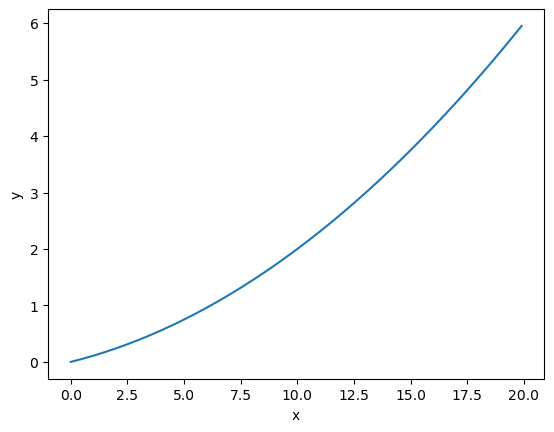

In [35]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [36]:
numerical_diff(function_1, 5)

0.1999999999990898

In [37]:
numerical_diff(function_1, 10)

0.2999999999986347

In [38]:
# 접선 함수 구현

In [39]:
def tangent_line(f, x):
    m = numerical_diff(f, x) #기울기
    
    return lambda t: m*(t-x) + f(x) # f(t) = m(t-x)+f(x) 는 점 (x,f(x))를 지나고 기울기가 m인 직선

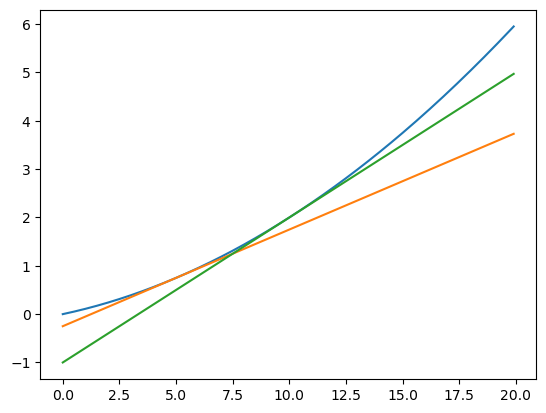

In [40]:
tf1 = tangent_line(function_1, 5) # 함수 정의
tf2 = tangent_line(function_1, 10) # 함수 정의
y2 = tf1(x)
y3 = tf2(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

### 4.3.3 편미분

<img src="./images/4.6.png" width="150" height="150"/>
(4.6)

In [41]:
def function_2(x):
    return x[0]**2 + x[1]**2 # np.sum(x**2)

#### (문제1)  $  x_0 = 3, x_1 = 4$일 때 $x_0$에 대한 편미분 구하기 

In [42]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [43]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

#### (문제2) $ x_0 = 3, x_1 = 4$일 때 $x_1$에 대한 편미분 구하기 

In [44]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [45]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기

* 기울기 : 모든 변수의 편미분을 벡터로 정리한 것

In [46]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h) 계산
        x[idx] = tmp_val -h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [47]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [48]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [49]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

#### $
f(x_0, x_1) = x_0^2 + x_1^2$ 의 기울기


<img src="./images/4-9.png" width="300" height="300"/>
[4-9]

(정리)
* 기울기는 각 지점에서 낮아지는 방향을 가리킨다(국소적으로)
* 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 줄이는 방향


### 4.4.1 경사법(경사 하강법)

* 최적 : 손실 함수가 최솟값이 될 때의 매개변수

#### (주의점)
* 함수의 극솟값, 최솟값, 안장점에서 기울기가 0이다(역은 반드시 성립하는 것은 아님)
* 안장점 : 방향에 따라 극댓값이면서 극소값이 동시에 되는 점
* 경사법은 기울기가 0인 점을 찾지만, 반드시 최솟값을 찾을 수 있는 것은 아님(극솟값or 안장점 가능성 존재)
* 평평한 곳의 고원(plateau)에서 학습이 진행되지 않을 가능성 존재

#### (경사하강법)
* 현 위치에서 기울어진 방향으로 일정 거리만큼 이동
* 이동한 곳에서 기울기를 구하고 기울기에 따라 손실함수를 최소화할 수 있는 방향으로 이동

#### (경사하강법의 수식) 학습률 에타(η) : 적당한 값으로 정해야 한다.

<img src="./images/4.7.png" width="100" height="100"/>
(4.7)

In [50]:
def gradient_descent(f, init_x, lr = 0.01, step_num =100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr* grad
        
    return x

#### (문제) $f(x_0, x_1) = x_0^2+x_1^2$의 최솟값 구하기

In [51]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [52]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num =100)

array([-6.11110793e-10,  8.14814391e-10])

<img src="./images/4-10.png" width="300" height="300"/>
[4-10]

### 적당한 학습률이 뭐야? => 하이퍼파라미터 조정....

In [53]:
# 학습률이 너무 클 때

In [54]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num =100)

array([-2.58983747e+13, -1.29524862e+12])

In [55]:
# 학습률이 너무 작을 때

In [56]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num =100)

array([-2.99999994,  3.99999992])

(해석)
* 학습률이 너무 큰 경우 큰 값으로 발산해버렸다
* 학습률이 너무 작은 경우 거의 갱신이 되지 않았다

#### (하이퍼 파라미터)
* 사람이 직접 설정해야하는 매개변수로 학습률 같은 매개변수

### 4.4.2 신경망에서의 기울기

<img src="./images/4.8.png" width="200" height="200"/>
(4.8)

In [57]:
# 신경망 학습의 기울기

In [58]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [59]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self, x):
        
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [60]:
net = simpleNet()

In [61]:
print(net.W)

[[ 0.52710882 -0.14483765 -1.6038739 ]
 [-0.90885584 -1.45719563  0.09078074]]


In [62]:
x = np.array([0.6, 0.9])
p = net.predict(x)

In [63]:
p

array([-0.50170497, -1.39837865, -0.88062167])

In [64]:
np.argmax(p)

0

In [65]:
t = np.array([0, 0, 1])

In [66]:
net.loss(x,t)

1.117288789341996

In [67]:
def f(W):
    return net.loss(x, t)

In [68]:
dW = numerical_gradient(f, net.W)  ###근데 책에서는 numberical_gradient를 약간 수정했다고 한다... 소스코드는 깃허브를 참고해야한다.

In [69]:
dW

array([[ 0.28673457,  0.116966  , -0.40370057],
       [ 0.43010186,  0.175449  , -0.60555086]])

In [70]:
# 람다기법 활용한 함수 표현 : 간단하게 표현하기

In [71]:
f = lambda w : net.loss(x, t)

In [72]:
dW = numerical_gradient(f, net.W)

## 4.5 학습 알고리즘 구현하기

#### (신경망 학습의 절차)
* 1단계 : 미니배치
    * 훈련 데이터 중 일부를 무작위로 가져와서 해당 배치에서의 손실함수값을 줄이는 것을 목표로 함
* 2단계 : 기울기 산출
    * 미니배치의 손실 함수 값을 줄이기 위한 가중치 매개변수의 기울기를 구함
* 3단계 : 매개변수 갱신 
    * 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
* 4단계 : 1~3단계 반복

#### 확률적 경사 하강법(Stochastic Gradient Descent; SGD)
* 미니배치를 무작위로 선정하기 때문에 '확률적' 이라고 부름

### 4.5.1 2층 신경망 클래스 구현하기

In [73]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

In [74]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std =0.01):
        # 가중치 초기화 => 아니 근데 random으로 초기화를 한다고?.....=> 추후(6.2절)에 이 문제에 대해 다룬다고 한다
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2)+ b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, aisx=1)
        t = np.argmax(t, aisx=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [75]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [76]:
net.params['W1'].shape

(784, 100)

In [77]:
net.params['b1'].shape

(100,)

In [78]:
net.params['W2'].shape

(100, 10)

In [79]:
net.params['b2'].shape

(10,)

In [80]:
# 예측처리

In [81]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [82]:
# grads는 params 변수에 대응하는 각 매개변수의 기울기 저장

In [83]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

In [84]:
grads = net.numerical_gradient(x, t)

In [85]:
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기

In [99]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [100]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize= True, one_hot_label=True)

In [101]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [102]:
# 하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100 # 미니배치
learning_rate = 0.1

In [103]:
train_loss_list = []

In [ ]:
for i in range(iters_num):
    print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습결과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

0
1
2
3
4
5
6
7
8
9
10
11


### 4.5.3 시험 데이터로 평가하기

* 오버피팅 : 예를 들면 훈련 데이터에 포함된 이미지만 제대로 구분하고, 그렇지 않은 이미지는 잘 식별하지 못하는 것
* 에폭 : 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수<br>
ex) 10000개의 데이터를 100개의 미니배치로 학습할 경우,확률적 경사 하강법을 100회 반복시 모든 훈련 데이터를 1회 소진. 즉 이 경우 100회가 1에폭.

In [1]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize= True, one_hot_label=True)

In [3]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [7]:
# 하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [8]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [9]:
# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

In [ ]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습결과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0 :
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))